# **Introduction to Computer Vision. Lab 06. Simple Neural Networks**

## **Theory:**
**Single-Layer Neural Network:**
- **Input Layer:** Takes the raw pixel values of the input images (flattened into a vector).
- **Weights (W) and Biases (b):** Parameters that the network learns during training to map inputs to outputs.
- **Activation Function:** Uses the softmax function to convert the output logits into probabilities, which helps in classification tasks by assigning a probability to each class.

**Softmax Function:**

$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} $
- Ensures that the output values are in the range [0, 1] and sum to 1, making them interpretable as probabilities.

**Loss Function:**
- **Cross-Entropy Loss:** Measures the performance of the classification model whose output is a probability value between 0 and 1.
$\text{Loss} = -\frac{1}{m} \sum_{i=1}^m y_i \log(\hat{y}_i) $
- Here, $( y_i )$ is the true label, and $( \hat{y}_i \$ is the predicted probability.

## **Exercise 1: Perform image classification using the neural network shown below**

### Neural Network Architecture:


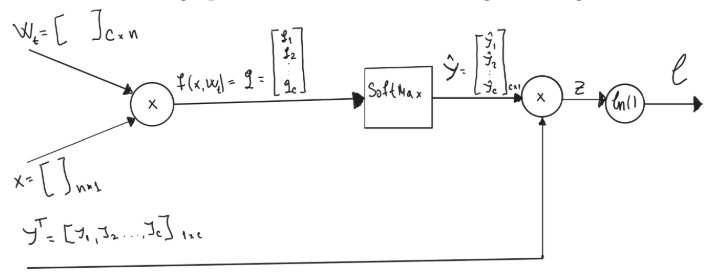

The neural network architecture shown above is a single-layer neural network with the softmax function applied to the output. Here is the implementation of this network for image classification using either the MNIST or CIFAR-10 dataset.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
def load_data(dataset='mnist'):
    if dataset == 'mnist':
        (X_train, y_train), (X_test, y_test) = ''' TO DO '''
        X_train = X_train.reshape(-1, 28*28) / 255.0
        X_test = X_test.reshape(-1, 28*28) / 255.0
    elif dataset == 'cifar10':
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
        X_train = ''' TO DO '''
        X_test = ''' TO DO '''
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

# Initialize weights
def initialize_weights(input_dim, output_dim):
    W = np.random.randn(input_dim, output_dim) * 0.01
    b = np.zeros((1, output_dim))
    return W, b

# Forward propagation
def forward_prop(X, W, b):
    Z = ''' TO DO '''
    A = ''' TO DO '''
    return A

# Compute loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = ''' TO DO '''
    return loss

# Backward propagation
def backward_prop(X, y_true, y_pred, W, b, learning_rate=0.01):
    m = y_true.shape[0]
    dZ = ''' TO DO '''
    dW = ''' TO DO '''
    db = ''' TO DO '''
    W -= ''' TO DO '''
    b -= ''' TO DO '''
    return W, b

# Training the model
def train_model(X_train, y_train, input_dim, output_dim, epochs=1000, learning_rate=0.01):
    W, b = initialize_weights(input_dim, output_dim)
    for epoch in range(epochs):
        y_pred = forward_prop(X_train, W, b)
        loss = compute_loss(y_train, y_pred)
        W, b = backward_prop(X_train, y_train, y_pred, W, b, learning_rate)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return W, b

# Evaluate the model
def evaluate_model(X_test, y_test, W, b):
    y_pred = forward_prop(X_test, W, b)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Load data
X_train, y_train, X_test, y_test = load_data(dataset='mnist')  # Change to 'cifar10' if using CIFAR-10

# Train model
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
W, b = train_model(X_train, y_train, input_dim, output_dim, epochs=1000, learning_rate=0.01)

# Evaluate model
evaluate_model(X_test, y_test, W, b)

## **Theory:**
**Two-Layer Neural Network:**

* **Input Layer:** Similar to the single-layer network, it takes the raw pixel values of the input images.
* **Hidden Layer:** Consists of neurons with ReLU activation functions, adding non-linearity to the model and allowing it to learn more complex representations.
* **Output Layer:** Uses the softmax function to produce probabilities for each class.


**ReLU Activation Function:**

$ReLU(𝑧) = max (0,𝑧)$

* Introduces non-linearity, helping the network to learn complex patterns.

**Forward Propagation:**

1. Compute the linear combination of inputs and weights for the hidden layer.
2. Apply ReLU activation to the result.
3. Compute the linear combination of the hidden layer outputs and weights for the output layer.
4. Apply the softmax function to obtain the final probabilities.

**Backward Propagation:**

* Involves computing gradients of the loss with respect to each weight and bias by applying the chain rule. This helps in updating the parameters to minimize the loss.

## **Excercise 2: Perform image classification using the neural network shown below**

### Neural Network Architecture:





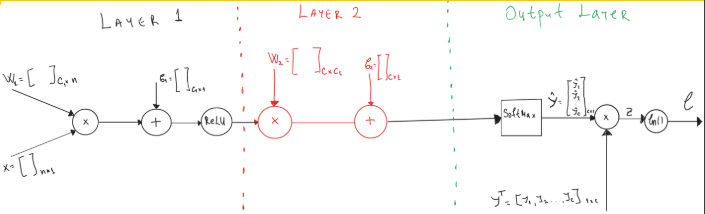

The neural network architecture shown above is a two-layer neural network with ReLU activation functions. Please write your implementation of this network for image classification using either the MNIST or CIFAR-10 dataset.

In [ ]:
# Initialize weights for two-layer network
def initialize_weights_two_layer(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# Forward propagation for two-layer network
def forward_prop_two_layer(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation
    Z2 = np.dot(A1, W2) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)  # Softmax activation
    return Z1, A1, Z2, A2

# Compute loss for two-layer network
def compute_loss_two_layer(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss

# Backward propagation for two-layer network
def backward_prop_two_layer(X, y_true, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate=0.01):
    m = ''' TO DO '''
    dZ2 = ''' TO DO '''
    dW2 = ''' TO DO '''
    db2 = ''' TO DO '''
    dA1 = ''' TO DO '''
    dZ1 = ''' TO DO '''
    dW1 = ''' TO DO '''
    db1 = ''' TO DO '''
    W1 -= ''' TO DO '''
    b1 -= ''' TO DO '''
    W2 -= ''' TO DO '''
    b2 -= ''' TO DO '''
    return W1, b1, W2, b2

# Training the two-layer model
def train_model_two_layer(X_train, y_train, input_dim, hidden_dim, output_dim, epochs=1000, learning_rate=0.01):
    W1, b1, W2, b2 = initialize_weights_two_layer(input_dim, hidden_dim, output_dim)
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = ''' TO DO '''
        loss = compute_loss_two_layer(y_train, A2)
        W1, b1, W2, b2 = ''' TO DO '''
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    return W1, b1, W2, b2

# Evaluate the two-layer model
def evaluate_model_two_layer(X_test, y_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop_two_layer(X_test, W1, b1, W2, b2)
    accuracy = np.mean(np.argmax(A2, axis=1) == np.argmax(y_test, axis=1))
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Load data
X_train, y_train, X_test, y_test = load_data(dataset='mnist')  # Change to 'cifar10' if using CIFAR-10

# Train two-layer model
input_dim = X_train.shape[1]
hidden_dim = 64  # You can adjust this parameter
output_dim = y_train.shape[1]
W1, b1, W2, b2 = train_model_two_layer(X_train, y_train, input_dim, hidden_dim, output_dim, epochs=1000, learning_rate=0.01)

# Evaluate two-layer model
evaluate_model_two_layer(X_test, y_test, W1, b1, W2, b2)

# **Important Notes:**





- For this lab, use the Softmax without the Normalization Layer. If you find that you have numerical problems because of some large exp(g), only then use the normalization layer. However, In that case, use the following normalization layer:


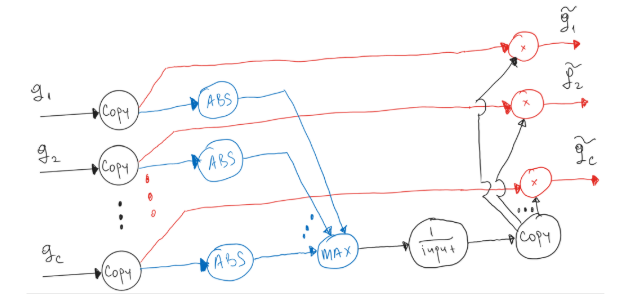

- where the ABS node is the absolute value operation $y = \text{ABS}(x) = |x|$, which has the following forward and backprop.

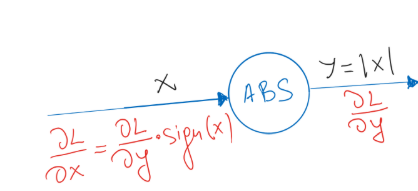

- Depending on your processing power, you can use either MINST or CIFAR10. Moreover, you can select
the number of classes and the size of the training set such it matches your processing power.

- Please keep these functions since you will use them in future labs.

- Please note that for you to get the maximum points, you should write a clean code with comments that

- explain what each part of the code does.
Upload on Moodle the code script.

# **Conclusion:**

* The single-layer neural network with softmax activation is a foundational model for classification tasks. It helps in understanding the basic concepts of neural networks, such as forward propagation, loss calculation, and backpropagation.

* The two-layer neural network with ReLU activation provides a more powerful model for classification tasks compared to the single-layer network. It can capture more complex data patterns, leading to better performance.